# Working with evolutionary models

In this tutorial, we will work with data from an evolutionary model. We will extract an isochrone and cooling curve by interpolating the data at a fixed age and mass, respectively. We will also compute synthetic photometry for a given  age and mass by using the associated grid with model spectra.

## Getting started

We start by importing `matplotlib`, `numpy`, and `species`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import species

Next, we initiate the workflow by calling the [SpeciesInit](https://species.readthedocs.io/en/latest/species.core.html#species.core.init.SpeciesInit) class. This will create both the [HDF5 database](https://species.readthedocs.io/en/latest/database.html) and the [configuration file](https://species.readthedocs.io/en/latest/configuration.html) in the working folder.

In [2]:
species.SpeciesInit()

Initiating species v0.5.5... [DONE]
Creating species_config.ini... [DONE]
Database: /Users/tomasstolker/applications/species/docs/tutorials/species_database.hdf5
Data folder: /Users/tomasstolker/applications/species/docs/tutorials/data
Working folder: /Users/tomasstolker/applications/species/docs/tutorials
Grid interpolation method: linear
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]


Now we will create and instance of [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database) that will provide read and write access to the [HDF5 database](https://species.readthedocs.io/en/latest/database.html) where all the data will be stored.

In [3]:
database = species.Database()

There are several evolutionary models supported by `species`. In this example, we will use the *ATMO* models that can be added with the [add_isochrones](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_isochrones) method of [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database). See the documentation of this method for a description of all the parameters and a list of other evolutionary models that are supported.

With `model='atmo'`, it will download and add both the chemical equilibrium and weak/strong non-equilibrium models of *ATMO*, including the magnitudes for MKO, WISE, and Spitzer filters.

In [4]:
database.add_isochrones(model='atmo')

Unpacking ATMO isochrones (9.6 MB) [DONE]
Adding isochrones: ATMO equilibrium chemistry... [DONE]
Database tag: atmo-ceq
Adding isochrones: ATMO non-equilibrium chemistry (weak)... [DONE]
Database tag: atmo-neq-weak
Adding isochrones: ATMO non-equilibrium chemistry (strong)... [DONE]
Database tag: atmo-neq-strong


## Extracting an isochrone

We can now read the evolutionary data from the database by creating an instance of [ReadIsochrone](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone) and providing the `tag` by which the data was stored in the database with [add_isochrones](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_isochrones). We will use the *ATMO CEQ* isochrones which were calculated with a cloudless, chemical-equilibrium atmosphere as boundary condition of the interior structure.

In [5]:
read_iso = species.ReadIsochrone(tag='atmo-ceq')

The [get_filters](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_filters) method can be used to check for which filters there are magnitudes included with the isochrone grid.

In [6]:
print(read_iso.get_filters())

['MKO_Y', 'MKO_J', 'MKO_H', 'MKO_K', 'MKO_Lp', 'MKO_Mp', 'W1', 'W2', 'W3', 'W4', 'IRAC_CH1', 'IRAC_CH2']


The [ReadIsochrone](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone) has several functionalities (see link for a complete list of methods and parameters). For example, [get_isochrone](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_isochrone) can be used to interpolate the evolutionary data at a fixed age and a range of masses. We can also optionally interpolate the magnitudes for any of the filters that are included with the grid. For this, we need to use one of the filter names from [get_filters](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_filters) as arguments for `filter_mag` and/or `filters_color`. Setting `masses=None` would select the masses at the nearest age point in the grid, but here we interpolate to a specified array of masses between 5 and 30 $M_\mathrm{J}$.

In [7]:
iso_box = read_iso.get_isochrone(age=50.,
                                 masses=np.linspace(5., 30., 50),
                                 filter_mag='MKO_H',
                                 filters_color=('MKO_K', 'MKO_Mp'))

The isochrone that is returned by [get_isochrone](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_isochrone) is stored in an [IsochroneBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.IsochroneBox). We can use the [open_box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box.open_box) method on any [Box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box) object to have a look at the content. Let's have a look!

In [8]:
iso_box.open_box()

Opening IsochroneBox...
model = atmo-ceq
age = 50.0
mass = [ 5.          5.51020408  6.02040816  6.53061224  7.04081633  7.55102041
  8.06122449  8.57142857  9.08163265  9.59183673 10.10204082 10.6122449
 11.12244898 11.63265306 12.14285714 12.65306122 13.16326531 13.67346939
 14.18367347 14.69387755 15.20408163 15.71428571 16.2244898  16.73469388
 17.24489796 17.75510204 18.26530612 18.7755102  19.28571429 19.79591837
 20.30612245 20.81632653 21.32653061 21.83673469 22.34693878 22.85714286
 23.36734694 23.87755102 24.3877551  24.89795918 25.40816327 25.91836735
 26.42857143 26.93877551 27.44897959 27.95918367 28.46938776 28.97959184
 29.48979592 30.        ]
teff = [ 721.86883896  764.57027946  804.235953    842.95432034  882.84151727
  921.7255665   958.55047785  994.73704115 1029.92588519 1066.99372349
 1104.46575691 1147.2540087  1198.23153406 1260.43331553 1363.11420439
 1472.83230803 1617.92858023 1763.93196411 1840.36990913 1889.334219
 1879.85432636 1834.99389221 1799.22369916 

The attributes from a [Box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box) can be simply extracted as usual for a Python object. For example, to extract the age at which the isochrone was interpolated:

In [9]:
print(iso_box.age)

50.0


Let's create a plot of the bolometric luminosity as function of mass.

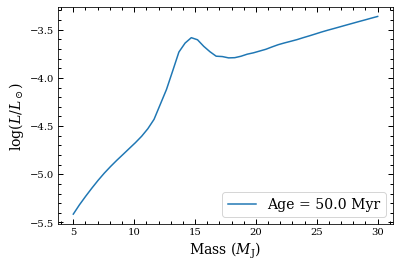

In [10]:
plt.plot(iso_box.mass, iso_box.log_lum, label=f'Age = {iso_box.age} Myr')
plt.xlabel(r'Mass ($M_\mathrm{J}$)', fontsize=14)
plt.ylabel(r'$\log(L/L_\odot)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

We can also plot the radius as function of mass.

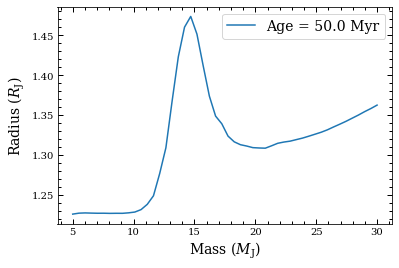

In [11]:
plt.plot(iso_box.mass, iso_box.radius, label=f'Age = {iso_box.age} Myr')
plt.xlabel(r'Mass ($M_\mathrm{J}$)', fontsize=14)
plt.ylabel(r'Radius ($R_\mathrm{J}$)', fontsize=14)
plt.legend(fontsize=14)
plt.show()

And finally let's plot the absolute (i.e. at 10 pc) MKO $H$-band magnitude that we had selected.

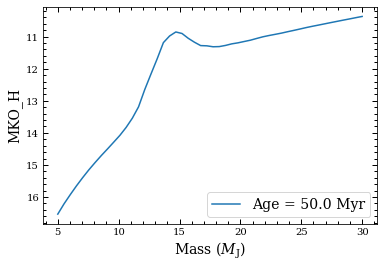

In [12]:
plt.plot(iso_box.mass, iso_box.magnitude, label=f'Age = {iso_box.age} Myr')
plt.xlabel(r'Mass ($M_\mathrm{J}$)', fontsize=14)
plt.ylabel(iso_box.filter_mag, fontsize=14)
plt.gca().invert_yaxis()
plt.legend(fontsize=14)
plt.show()

## Extracting a cooling curve

Similarly to extracting an isochrone, we can extract a cooling curve with the [get_cooling_curve](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_cooling_curve) method, which will interpolate the evolutionary data at a fixed mass and a range of ages. Instead of providing an `numpy` array with ages, we can also set the argument of `ages` to `None`. In that case it use the ages that are available in the original data.

In [13]:
cooling_box = read_iso.get_cooling_curve(mass=10.,
                                         ages=None,
                                         filters_color=None,
                                         filter_mag=None)

The cooling curve that is returned by [get_cooling_curve](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_cooling_curve) is stored in an [CoolingBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.CoolingBox). Let's have a look at the content by again using the [open_box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box.open_box) method.

In [14]:
cooling_box.open_box()

Opening CoolingBox...
model = atmo-ceq
mass = 10.0
age = [1.00000000e+00 1.26638017e+00 1.60371874e+00 2.03091762e+00
 2.57191381e+00 3.25702066e+00 4.12462638e+00 5.22334507e+00
 6.61474064e+00 8.37677640e+00 1.06081836e+01 1.34339933e+01
 1.70125428e+01 2.15443469e+01 2.72833338e+01 3.45510729e+01
 4.37547938e+01 5.54102033e+01 7.01703829e+01 8.88623816e+01
 1.12533558e+02 1.42510267e+02 1.80472177e+02 2.28546386e+02
 2.89426612e+02 3.66524124e+02 4.64158883e+02 5.87801607e+02
 7.44380301e+02 9.42668455e+02 1.19377664e+03 1.51177507e+03
 1.91448198e+03 2.42446202e+03 3.07029063e+03 3.88815518e+03
 4.92388263e+03 6.23550734e+03 7.89652287e+03 1.00000000e+04]
teff = [2309.92136414 2271.31843036 2227.60151094 2175.22268751 2113.25214823
 2045.29126453 1973.17836919 1895.94171811 1811.46845225 1723.32054156
 1634.65913374 1551.31030152 1459.23911948 1366.5750378  1287.77172299
 1211.22247039 1136.43302722 1064.724456    998.14220538  934.54155053
  870.8850384   807.72649858  749.5384918

We can create a plot of the bolometric luminosity as function of time by selecting the respective attributes in the [Box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box) object.

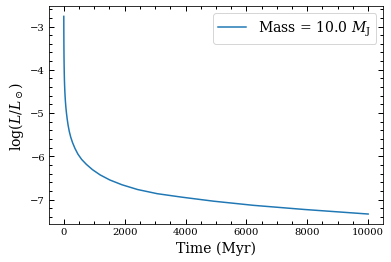

In [15]:
plt.plot(cooling_box.age, cooling_box.log_lum, label=f'Mass = {cooling_box.mass}'+r' $M_\mathrm{J}$')
plt.xlabel(r'Time (Myr)', fontsize=14)
plt.ylabel(r'$\log(L/L_\odot)$', fontsize=14)
plt.legend(fontsize=14)
plt.show()

## Synthetic photometry from model spectra

As we saw earlier, magnitudes are available with some evolutionary models for some filters. If we want to calculate synthetic photometry for any arbitrary filter from the [SVO Filter Profile Service](http://svo2.cab.inta-csic.es/svo/theory/fps/), we can use the [get_photometry](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_photometry) method from [ReadIsochrone](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone). We simply need to provide the age, mass, distance, and name of the filter. For this example, we use the [JWST/NIRCAM F360M filter](http://svo2.cab.inta-csic.es/svo/theory/fps/index.php?id=JWST/NIRCam.F360M&&mode=browse&gname=JWST&gname2=NIRCam#filter).

The method selects automatically the atmospheric model that is associated with the evolutionary model (the argument of `atmospheric_model` is by default set to `None`) and downloads the data if not present in the [data_folder](https://species.readthedocs.io/en/latest/configuration.html). It then interpolates the grid of spectra at the bulk and atmospheric parameters for the requested age and mass, and uses the filter profile for the computation of the synthetic photometry.

In [16]:
phot_box = read_iso.get_photometry(age=100., mass=20., distance=20., filter_name='JWST/NIRCam.F360M')

Adding filter: JWST/NIRCam.F360M... [DONE]

/Users/tomasstolker/applications/species/species/read/read_model.py:144: UserWarning: The 'atmo-ceq' model spectra are not present in the database. Will try to add the model grid. If this does not work (e.g. currently without an internet connection) then please use the 'add_model' method of 'Database' to add the grid of spectra yourself.
  warnings.warn(


 [DONE]
Unpacking ATMO CEQ model spectra (455 MB)... [DONE]
Please cite Phillips et al. (2020) when using ATMO CEQ in a publication
Reference URL: https://ui.adsabs.harvard.edu/abs/2020A%26A...637A..38P/abstract
Wavelength range (um) = 0.2 - 6000
Spectral resolution = 10000
Teff range (K) = 200 - 3000
Adding ATMO CEQ model spectra... [DONE]                              
Grid points stored in the database:
   - Teff = [ 200.  250.  300.  350.  400.  450.  500.  550.  600.  700.  800.  900.
 1000. 1100. 1200. 1300. 1400. 1500. 1600. 1700. 1800. 1900. 2000. 2100.
 2200. 2300. 2400. 2500. 2600. 2700. 2800. 2900. 3000.]
   - log(g) = [2.5 3.  3.5 4.  4.5 5.  5.5]
Number of grid points per parameter:
   - teff: 33
   - logg: 7
Fix missing grid points with a linear interpolation:
Number of stored grid points: 231
Number of interpolated grid points: 0
Number of missing grid points: 0
Adding Vega spectrum... [DONE]


The [get_photometry](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_photometry) method returns a [PhotometryBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.PhotometryBox) that contains both the magnitude and flux density. Let's use the [open_box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box.open_box) method to have a look at the content.

In [17]:
phot_box.open_box()

Opening PhotometryBox...
name = atmo-ceq
sptype = None
wavelength = [3.62605786956827]
flux = [(3.014535553469553e-16, None)]
app_mag = [(13.290030072231758, None)]
abs_mag = [(11.784880093911852, None)]
filter_name = ['JWST/NIRCam.F360M']


## Extracting a model spectrum

A model spectrum, as previously used for calculating the synthetic photometry, can also be extracted. This can be useful for analyzing the spectral appearance as function of age and mass. We can use the [get_spectrum](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_spectrum) method and specify the age, mass, and distance. Additionally we can set the wavelength range and the spectral resolution that is used to smooth the spectra to the instrument's resolution. We will extract the spectra for 10, 20, and 30 $M_\mathrm{J}$ at an age of 100 Myr.

In [18]:
boxes = []
for mass in [10., 20., 30.]:
    model_box = read_iso.get_spectrum(age=100., mass=mass, distance=20., wavel_range=(0.8, 5.), spec_res=100.)
    boxes.append(model_box)

The [get_spectrum](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_spectrum) method returns a [ModelBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ModelBox). We can again use the [open_box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box.open_box) method to have a look at the content of the first [ModelBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ModelBox) in the `boxes` list.

In [19]:
boxes[0].open_box()

Opening ModelBox...
model = atmo-ceq
type = None
wavelength = [0.79998813 0.8000674  0.80014669 ... 4.99918732 4.9996827  5.00017813]
flux = [3.66925465e-18 3.67881491e-18 3.68855193e-18 ... 6.96597313e-17
 6.96252108e-17 6.95901196e-17]
parameters = {'teff': 904.1733101126721, 'logg': 4.26009016659564, 'radius': 1.166674078951012, 'distance': 20.0, 'luminosity': 8.655066224443543e-06, 'mass': 9.99479099661175}
quantity = flux
contribution = None
bol_flux = None


The spectra can be easily plotted by passing the list of [Box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box) objects to the [plot_spectrum](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_spectrum.plot_spectrum) function. Alternatively, one can select the `wavelength` and `flux` attributes from a [ModelBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ModelBox) object and use [Matplotlib](https://matplotlib.org) directly. Let's have a look at the extracted spectrum!

Plotting spectrum...

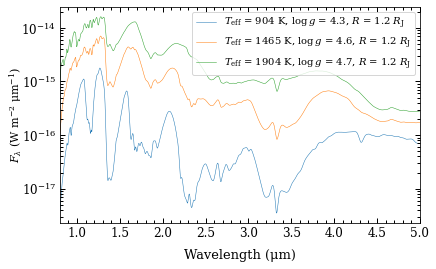

 [DONE]


In [20]:
fig = species.plot_spectrum(boxes=boxes,
                            figsize=(5, 3),
                            legend={'loc': 'upper right'},
                            xlim=(0.8, 5.),
                            scale=('linear', 'log'))

## Computing color-magnitude tracks

Another method that is available for computing synthetic magnitudes, are the [get_color_magnitude](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_color_magnitude) and [get_color_color](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_color_color) methods. In contrast to [get_photometry](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_photometry), we can specify an array with masses, and also the filters for the color and absolute magnitude. In this example, we set the argument of `masses` to `None` such that the mass points from the original grid are used that are closest to an age of 100 Myr.

We can specify any of the filters from the [SVO Filter Profile Service](http://svo2.cab.inta-csic.es/svo/theory/fps/) as arguments for `filters_color` and `filter_mag`, since the photometry will be computed from the model spectra instead of extracted from the evolutionary grid. The method selects automatically the associated grid of model spectra and would download the data if not yet present in the [data_folder](https://species.readthedocs.io/en/latest/configuration.html).

In [21]:
color_mag_box = read_iso.get_color_magnitude(age=100.,
                                             masses=None,
                                             filters_color=('JWST/MIRI.F560W', 'JWST/MIRI.F770W'),
                                             filter_mag='JWST/MIRI.F560W')

Adding filter: JWST/MIRI.F560W... [DONE]
Adding filter: JWST/MIRI.F770W... [DONE]


The [get_color_magnitude](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_color_magnitude) method returns a [ColorMagBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ColorMagBox) that contains all the data. Let's have a look at its content with [open_box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box.open_box).

In [22]:
color_mag_box.open_box()

Opening ColorMagBox...
library = atmo-ceq
iso_tag = atmo-ceq
object_type = model
filters_color = ('JWST/MIRI.F560W', 'JWST/MIRI.F770W')
filter_mag = JWST/MIRI.F560W
color = [1.2225814  0.85433631 0.60987362 0.46302445 0.37272156 0.32059355
 0.29289069 0.25497598 0.2218545  0.16934546 0.12669631 0.08144192
 0.03174126 0.0752873  0.04034163 0.03235509 0.03224972 0.03339698
 0.03747053 0.04385726 0.05077152 0.06536415 0.07653423 0.09370929
 0.10969999 0.12740805 0.14157833 0.15306423 0.16278068 0.16924124
 0.17236553 0.17541345 0.17293438 0.17050317 0.16709572 0.16098815
 0.1555626  0.14892547 0.14094542 0.13392631 0.12721122 0.12054202
 0.11480161 0.10977634 0.10488248 0.10034246 0.09637425 0.09274285
 0.08946086 0.08649296 0.08375946 0.0812326  0.07893245 0.0767561
 0.07466648 0.07272241 0.07091927 0.06922044 0.06766254 0.06619685
 0.06493635 0.0636848  0.06255151 0.0614647  0.06043058 0.059449
 0.05852919 0.05763665 0.0567476  0.0559019  0.05510436 0.05433986
 0.05360374 0.05289675 0.0

The attributes from the [ColorMagBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ColorMagBox) can be plotted manually or it can be directly provided as input to the [plot_color_magnitude](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_color.plot_color_magnitude) function. Similarly, a returned [ColorColorBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ColorColorBox) from the [get_color_color](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone.get_color_color) method of [ReadIsochrone](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_isochrone.ReadIsochrone) can be used as input to the [plot_color_color](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_color.plot_color_color) function.

The [plot_color_magnitude](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_color.plot_color_magnitude) function requires a list of [Box](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.Box) objects as input, which is provided as argument of `boxes`. In this example, we only include for simplicity only a single item in the list with `boxes`. We place also several labels at specific masses of the color-magnitude track that we extracted from the *ATMO CEQ* models.

Plotting color-magnitude diagram...

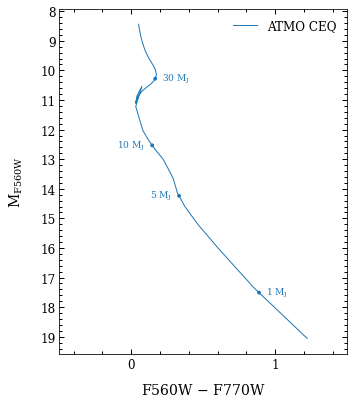

 [DONE]


In [23]:
fig = species.plot_color_magnitude(boxes=[color_mag_box],
                                   mass_labels={'atmo-ceq': [(1., 'right'), (5., 'left'), (10., 'left'), (30., 'right')]},
                                   label_x=r"F560W $-$ F770W",
                                   label_y=r"M$_\mathrm{F560W}$",
                                   xlim=(-0.5, 1.5),
                                   legend={'loc': 'upper right', 'frameon': False, 'fontsize': 12.})

The [plot_color_magnitude](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_color.plot_color_magnitude) returned the [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) object of the plot. The functionalities of [Matplotlib](https://matplotlib.org/stable/index.html) can be used for further customization of the plot. For example, the axes of the plot are stored at the `axes` attribute of `Figure`.

In [24]:
fig.axes

[<Axes: xlabel='F560W $-$ F770W', ylabel='M$_\\mathrm{F560W}$'>]

In this case the list of axes contains only a single item. As an example we will add an additional data point, update the legend, and increase the fontsize of the axis labels.

In [25]:
fig.axes[0].plot(0., 14, 'o', color='tab:orange', ms=5, label='Example')
fig.axes[0].legend(frameon=False, fontsize=12)
fig.axes[0].xaxis.label.set_fontsize(18.)
fig.axes[0].yaxis.label.set_fontsize(18.)

To show the updated figure, we simply call the `Figure` object of the plot. To save the plot to a file, the [savefig](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) method of the figure can be used.

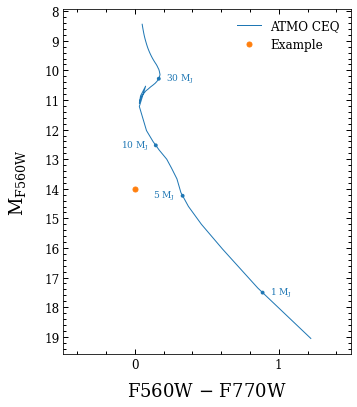

In [26]:
fig